<a href="https://colab.research.google.com/github/emanuel379/Calculo-Numerico/blob/main/C%C3%A1lculo_Num%C3%A9rico_Interpola%C3%A7%C3%A3o_Polinomial_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.interpolate import interp1d
import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time
import matplotlib.pyplot as plt

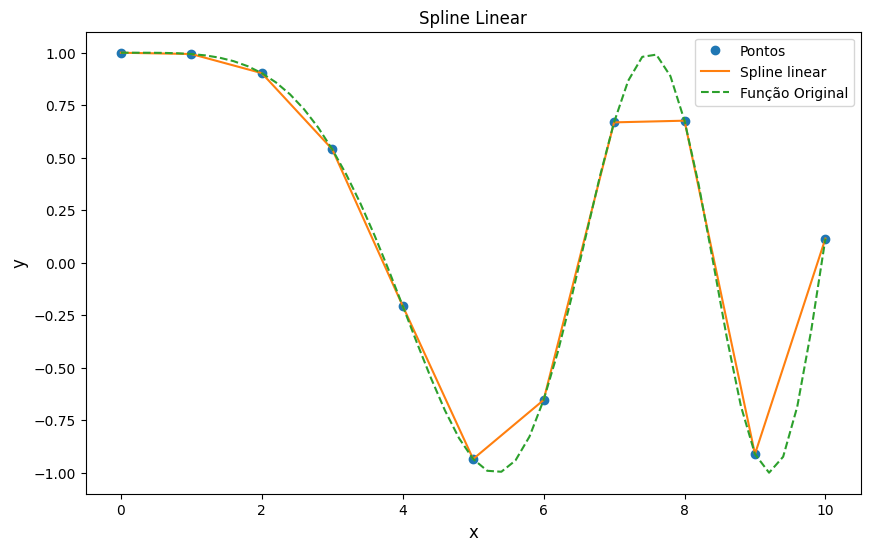

In [ ]:
# Com função pronta

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)

xnew = np.linspace(0, 10, num=51, endpoint=True)
f2 = np.cos(-xnew**2/9.0)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2, '--')
plt.legend(['Pontos', 'Spline linear', 'Função Original'], loc='best')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Spline Linear')
plt.show()

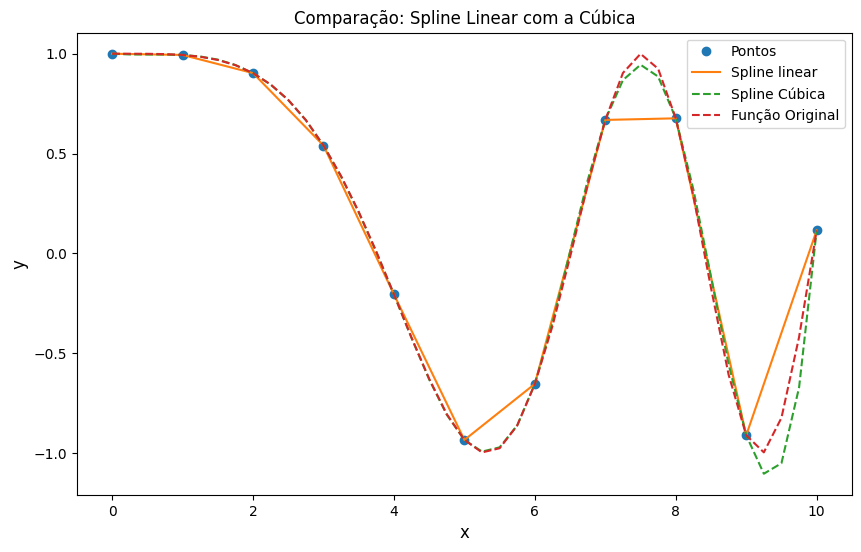

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y) # Spline LINEAR
f2 = interp1d(x, y, kind='cubic') # Spline Cubica
xnew = np.linspace(0, 10, num=41, endpoint=True)
f3 = np.cos(-xnew**2/9.0)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3, '--')
plt.legend(['Pontos', 'Spline linear', 'Spline Cúbica', 'Função Original'], loc='best')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Comparação: Spline Linear com a Cúbica')
plt.show()

[-2.  0.  3.  5.]
[ 3. -2.  4.  2.]


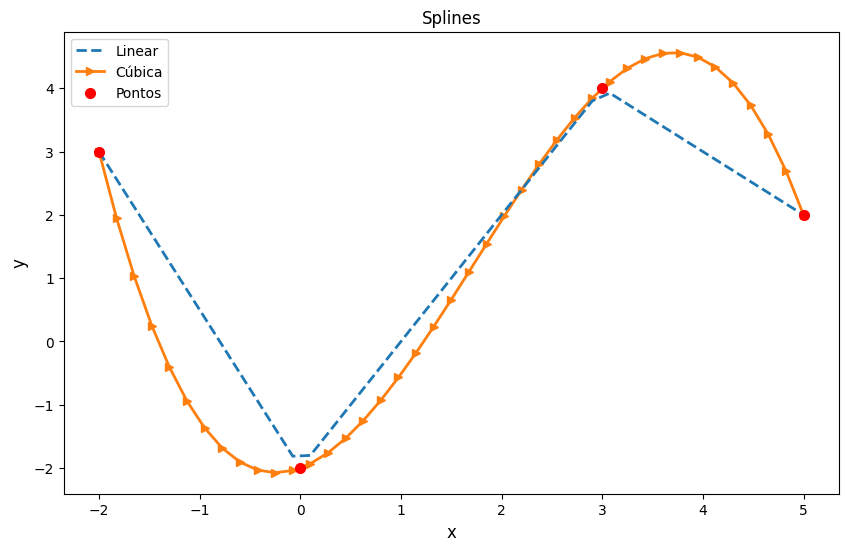

In [ ]:
# Exemplo slide 12 interpolation

xi = np.array([-2,0,3,5], dtype='double')
print(xi)
yi = np.array([3,-2,4,2], dtype='double')
print(yi)
x = np.linspace(-2, 5, num=41, endpoint=True)

f_linear = interp1d(xi,yi)
y_linear = f_linear(x)
f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

[-1.         -0.93333333 -0.86666667 -0.8        -0.73333333 -0.66666667
 -0.6        -0.53333333 -0.46666667 -0.4        -0.33333333 -0.26666667
 -0.2        -0.13333333 -0.06666667  0.          0.06666667  0.13333333
  0.2         0.26666667  0.33333333  0.4         0.46666667  0.53333333
  0.6         0.66666667  0.73333333  0.8         0.86666667  0.93333333
  1.        ]
[0.03846154 0.04390244 0.0505618  0.05882353 0.06923077 0.08256881
 0.1        0.12328767 0.15517241 0.2        0.26470588 0.36
 0.5        0.69230769 0.9        1.         0.9        0.69230769
 0.5        0.36       0.26470588 0.2        0.15517241 0.12328767
 0.1        0.08256881 0.06923077 0.05882353 0.0505618  0.04390244
 0.03846154]


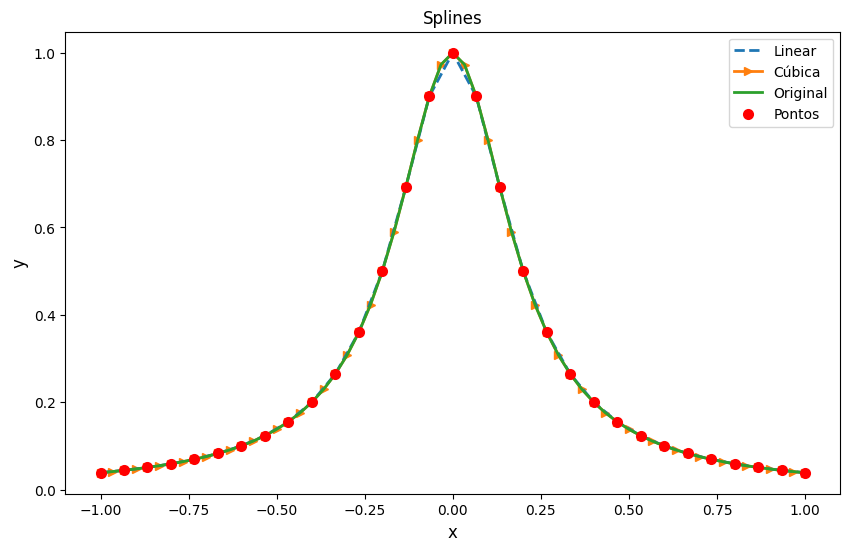

In [ ]:
# Exemplo do fenômeno de runge com 31 nós de interpolação

xi = np.linspace(-1,1,num=31, endpoint=True)
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exat = 1/(1+25*x**2)

f_linear = interp1d(xi,yi)
y_linear = f_linear(x)
f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

##**Lista 3**

**2.** Parte prática

**1**

a

[-1.         -0.86666667 -0.73333333 -0.6        -0.46666667 -0.33333333
 -0.2        -0.06666667  0.06666667  0.2         0.33333333  0.46666667
  0.6         0.73333333  0.86666667  1.        ]
[0.03846154 0.0505618  0.06923077 0.1        0.15517241 0.26470588
 0.5        0.9        0.9        0.5        0.26470588 0.15517241
 0.1        0.06923077 0.0505618  0.03846154]


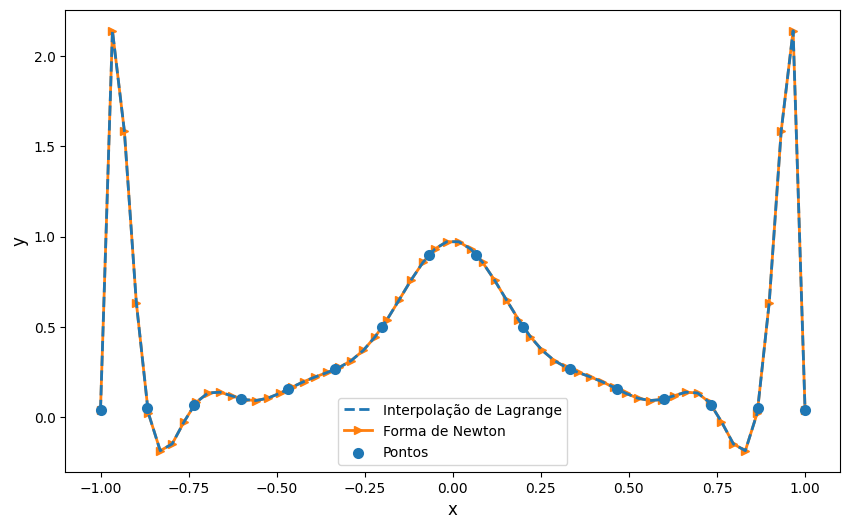

In [ ]:
# Interpolação de Lagrange
# Com 16 nós

def lagrange_interp(xi,yi,x):
    n = np.size(xi) # maior dimensão de um vetor unidimensional
    m = np.size(x) # maior dimensão de um vetor unidimensional

    L = np.ones((n,m))

    for i in np.arange(n):
      for j in np.arange(n):
        if(i != j):
           L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j])

    y = yi.dot(L); # --> yi é vetor linha 1xn L é matriz nxm --> 1xm
    return y

# Interpolação de Newton
# Com 16 nós
def newton_interp(xi,yi,x):
  n = np.size(xi); ni = np.size(x); N = np.ones((n,ni))
  D = np.zeros((n,n)); D[:,0] = yi

  for j in np.arange(n-1): # matriz de diferenças divididas
      for i in np.arange(n-j-1):
          D[i,j+1] = (D[i+1,j]-D[i,j])/(xi[i+j+1]-xi[i])

  for i in np.arange(1,n): # loop do produtório da forma de Newton
      N[i,:] = N[i-1,:]*(x-xi[i-1])

  y = D[0,:].dot(N)

  return y

xi = np.linspace(-1,1,num=16, endpoint=True)
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=60, endpoint=True)
y_exat = 1/(1+25*x**2)

y_lagrange16 = lagrange_interp(xi,yi,x)
y_newton16 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange16,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton16,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

b

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.03846154 0.05882353 0.1        0.2        0.5        1.
 0.5        0.2        0.1        0.05882353 0.03846154]


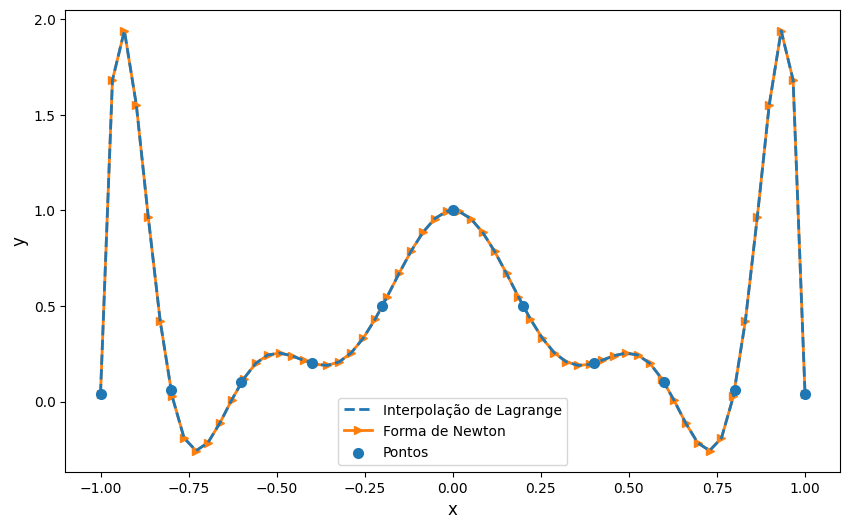

In [ ]:
xi = np.linspace(-1,1,num=11, endpoint=True)
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=60, endpoint=True)
y_exat = 1/(1+25*x**2)

y_lagrange11 = lagrange_interp(xi,yi,x)
y_newton11 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange11,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton11,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

c

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[0.03846154 0.04705882 0.05882353 0.0754717  0.1        0.13793103
 0.2        0.30769231 0.5        0.8        1.         0.8
 0.5        0.30769231 0.2        0.13793103 0.1        0.0754717
 0.05882353 0.04705882 0.03846154]


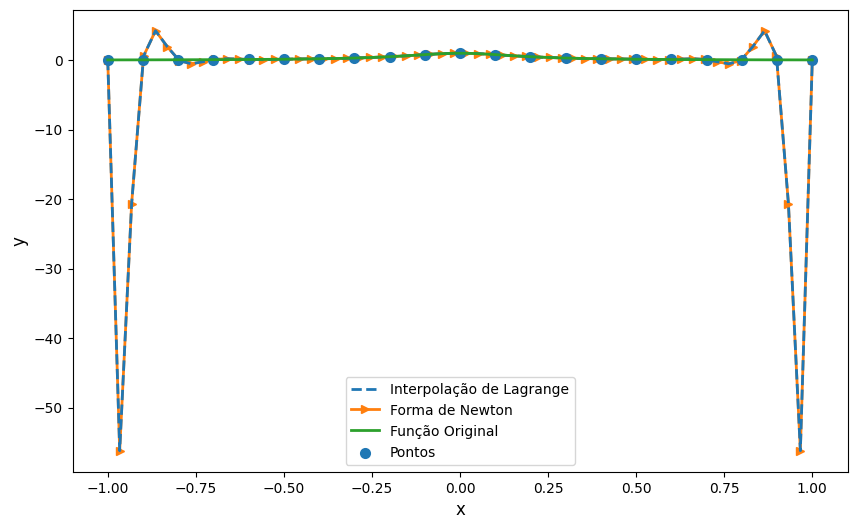

In [ ]:
xi = np.linspace(-1,1,num=21, endpoint=True)
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=60, endpoint=True)
y_exat = 1/(1+25*x**2)

y_lagrange21 = lagrange_interp(xi,yi,x)
y_newton21 = newton_interp(xi,yi,x)
y_exat = 1/(1+25*x**2)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange21,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton21,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

É possível observar que, mesmo com o aumento no número de pontos, o erro das interpolações de Newton e Lagrange não diminui, pelo contrário, observa-se um aumento do erro de interpolação a medida que mais pontos são fornecidos

d

[-1.         -0.86666667 -0.73333333 -0.6        -0.46666667 -0.33333333
 -0.2        -0.06666667  0.06666667  0.2         0.33333333  0.46666667
  0.6         0.73333333  0.86666667  1.        ]
[0.03846154 0.0505618  0.06923077 0.1        0.15517241 0.26470588
 0.5        0.9        0.9        0.5        0.26470588 0.15517241
 0.1        0.06923077 0.0505618  0.03846154]


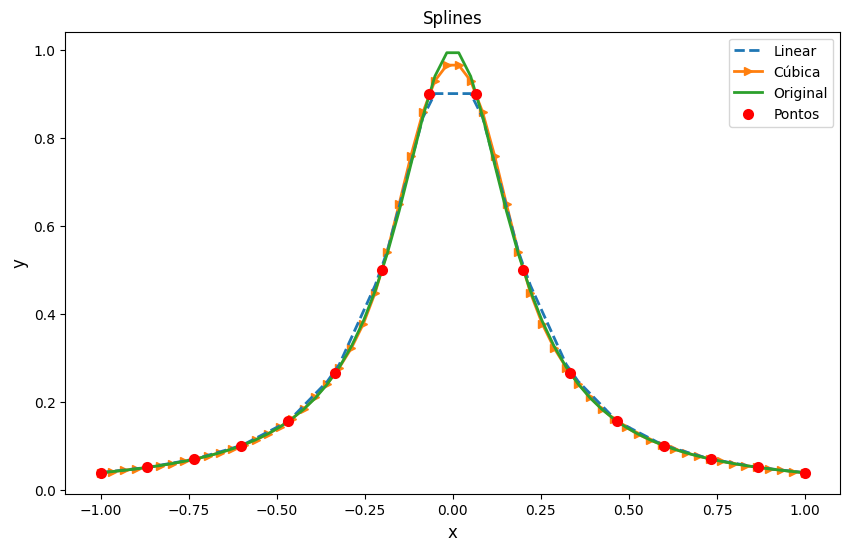

In [ ]:
# Utilizando as splines linear e cúbica

xi = np.linspace(-1,1,num=16, endpoint=True)
print(xi)
yi = 1/(1+25*xi**2)
print(yi)
x = np.linspace(-1, 1, num=60, endpoint=True)
y_exat = 1/(1+25*x**2)

f_linear = interp1d(xi,yi)
y_linear = f_linear(x)
f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Splines')
plt.legend()
plt.show()

É possível observar uma melhoria na interpolação por meio das splines cúbica e linear quando comparadas aos métodos de Newton e Lagrange, o que nos permite uma melhor aproximação em relação à função original.

e

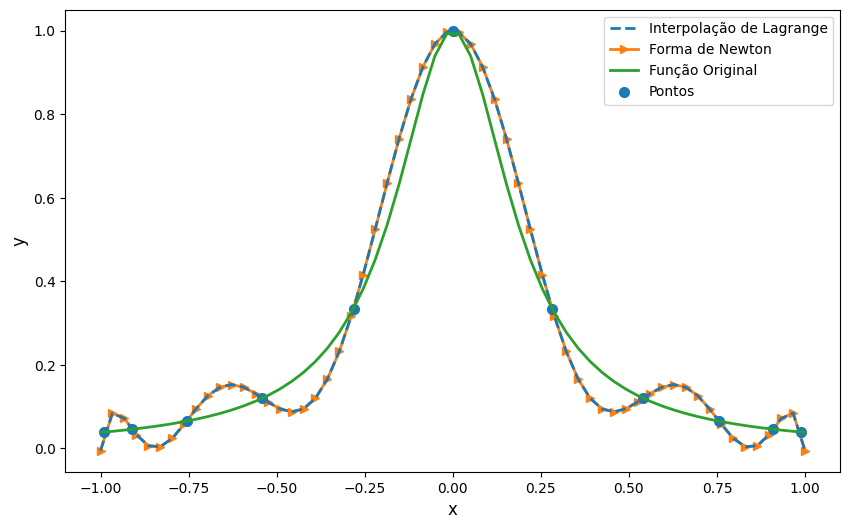

In [ ]:
# Repetindo o item b com nós de Chebshev

a = -1; b = 1
# 11 nós de interpolação
n = 10
xi = np.zeros(n+1)
i = np.arange(n+1)
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*m.pi/(2*(n+1)))/2
yi = 1/(1+25*xi**2)

y_lagrange11 = lagrange_interp(xi,yi,x)
y_newton11 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange11,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton11,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

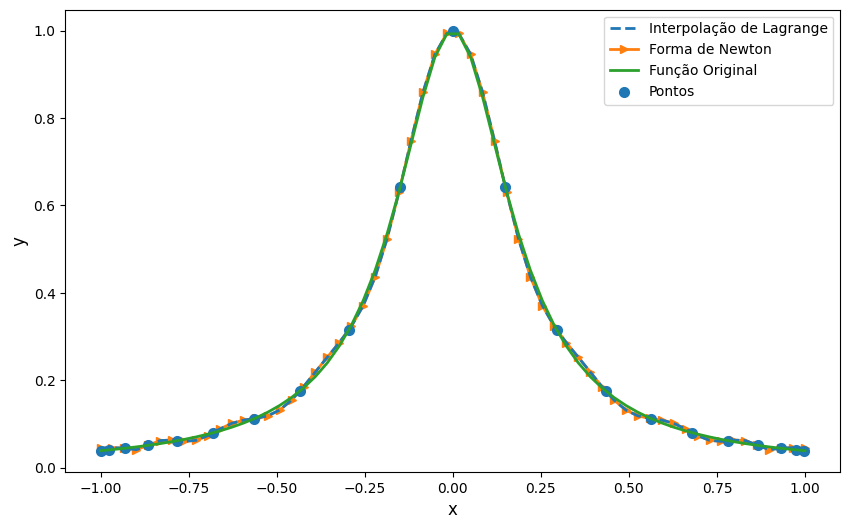

In [ ]:
# Repetindo o item c com nós de Chebshev

a = -1; b = 1
# 21 nós de interpolação
n = 20
xi = np.zeros(n+1)
i = np.arange(n+1)
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*m.pi/(2*(n+1)))/2
yi = 1/(1+25*xi**2)

y_lagrange21 = lagrange_interp(xi,yi,x)
y_newton21 = newton_interp(xi,yi,x)


plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange21,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton21,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

**2**

a

[0.  0.5 1.  6.  7.  9. ]
[0.  1.6 2.  2.  1.5 0. ]


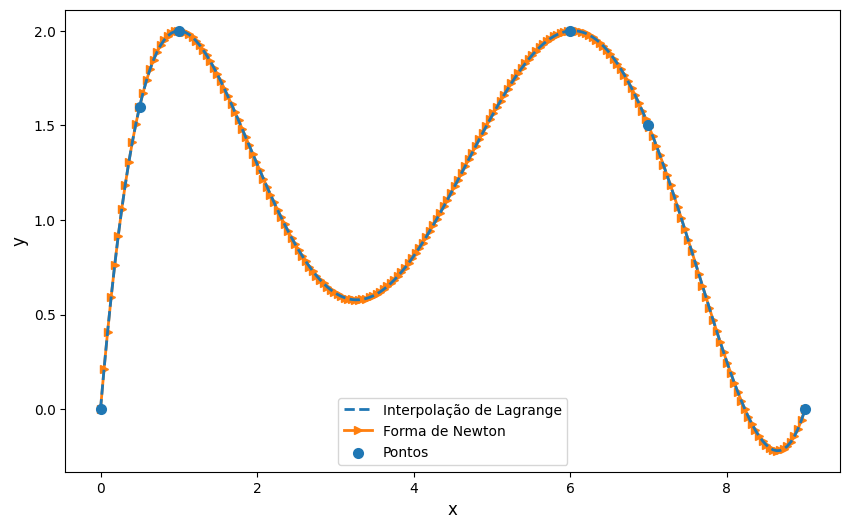

In [ ]:
xi = np.array([0, 0.5, 1, 6, 7, 9], dtype='double')
print(xi)
yi = np.array([0, 1.6, 2, 2, 1.5, 0], dtype='double')
print(yi)
x = np.linspace(0, 9, num=200, endpoint=True)

y_lagrange = lagrange_interp(xi,yi,x)
y_newton = newton_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

[0.  0.5 1.  6.  7.  9. ]
[0.  1.6 2.  2.  1.5 0. ]


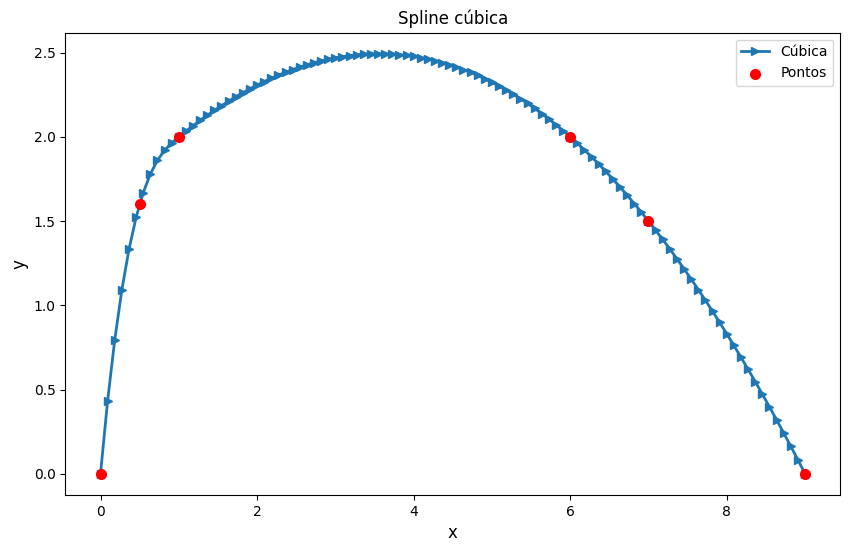

In [ ]:
xi = np.array([0, 0.5, 1, 6, 7, 9], dtype='double')
print(xi)
yi = np.array([0, 1.6, 2, 2, 1.5, 0], dtype='double')
print(yi)
x = np.linspace(0, 9, num=100, endpoint=True)

f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Spline cúbica')
plt.legend()
plt.show()

c

[0.  0.5 1.  6.  7.  9. ]
[0.  1.6 2.  2.  1.5 0. ]


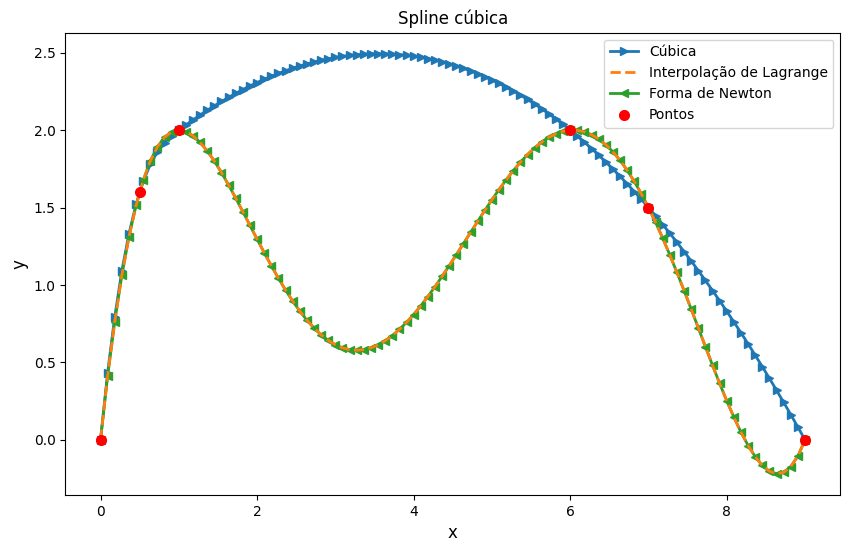

In [ ]:
xi = np.array([0, 0.5, 1, 6, 7, 9], dtype='double')
print(xi)
yi = np.array([0, 1.6, 2, 2, 1.5, 0], dtype='double')
print(yi)
x = np.linspace(0, 9, num=100, endpoint=True)

y_lagrange = lagrange_interp(xi,yi,x)
y_newton = newton_interp(xi,yi,x)
f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_lagrange,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton,label = 'Forma de Newton',linewidth = 2,marker='<',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Spline cúbica')
plt.legend()
plt.show()

A interpolação por Newton e Lagrange, aparentemente, retornou a melhor função para a interpolação dos pontos no caso apresentado, o que faz com que a interpolação por partes não pareça necessária.

**3**

a

[ 0.  1.  4.  9. 16. 25. 36. 49. 64.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


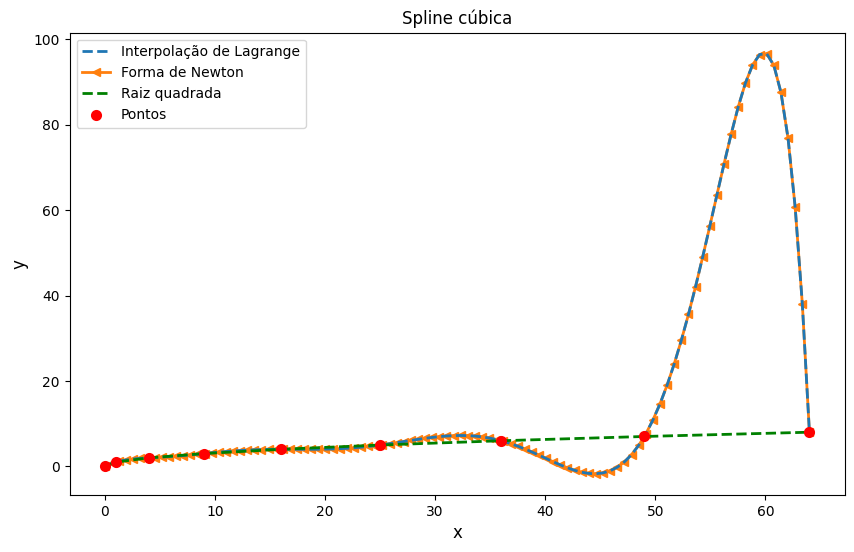

In [ ]:
xi = np.array([0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64], dtype='double')
print(xi)
y = []
for i in xi:
  yi = m.sqrt(i)
  y.append(yi)
y = np.array(y, dtype = 'double')
print(y)
x = np.linspace(0, 64, num=100, endpoint=True)

y_lagrange = lagrange_interp(xi,y,x)
y_newton = newton_interp(xi,y,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton,label = 'Forma de Newton',linewidth = 2,marker='<',zorder=1)
plt.plot(xi, y,label = 'Raiz quadrada',linewidth = 2,linestyle='--',zorder=3, color = 'green')
plt.scatter(xi,y,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Spline cúbica')
plt.legend()
plt.show()

b

[ 0.  1.  4.  9. 16. 25. 36. 49. 64.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


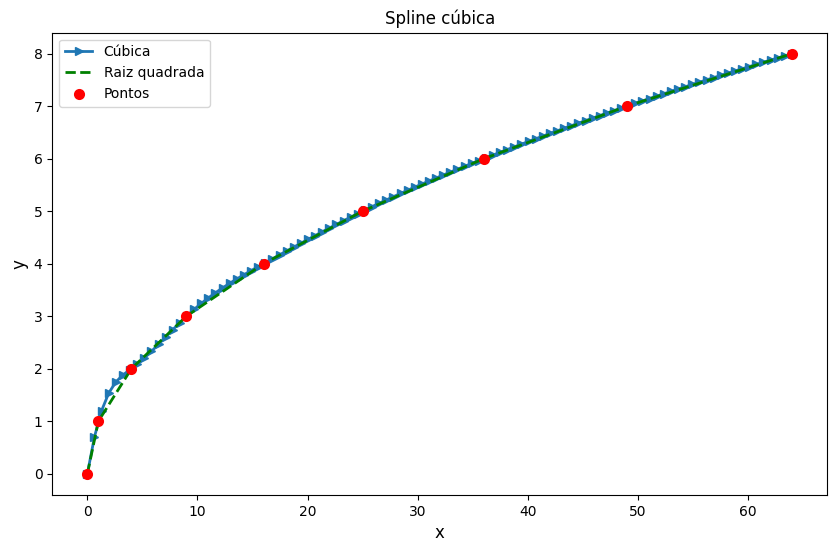

In [ ]:
xi = np.array([0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64], dtype='double')
print(xi)
y = []
for i in xi:
  yi = m.sqrt(i)
  y.append(yi)
y = np.array(y, dtype = 'double')
print(y)
x = np.linspace(0, 64, num=100, endpoint=True)

f_cubic = interp1d(xi,y, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(xi, y,label = 'Raiz quadrada',linewidth = 2,linestyle='--',zorder=3, color = 'green')
plt.scatter(xi,y,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Spline cúbica')
plt.legend()
plt.show()

Para o intervalo [0, 64], temos que a spline cúbica é melhor do que a interpolaçõa por Newton ou Lagrange, uma vez que essa segue uma função aproximada raiz quadrada, enquanto as demais não obedecem essa função em toda sua extensão.

c

In [ ]:
xi = np.array([0.0, 1.0], dtype='double')
print(xi)
y = []
for i in xi:
  yi = m.sqrt(i)
  y.append(yi)
y = np.array(y, dtype = 'double')
print(y)
x = np.linspace(0, 1, num=100, endpoint=True)

f_cubic = interp1d(xi,y, kind='cubic')
y_cubic = f_cubic(x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(xi, y,label = 'Raiz quadrada',linewidth = 2,linestyle='--',zorder=3, color = 'green')
plt.scatter(xi,y,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Spline cúbica')
plt.legend()
plt.show()

[0. 1.]
[0. 1.]


ValueError: ignored

[0. 1.]
[0. 1.]


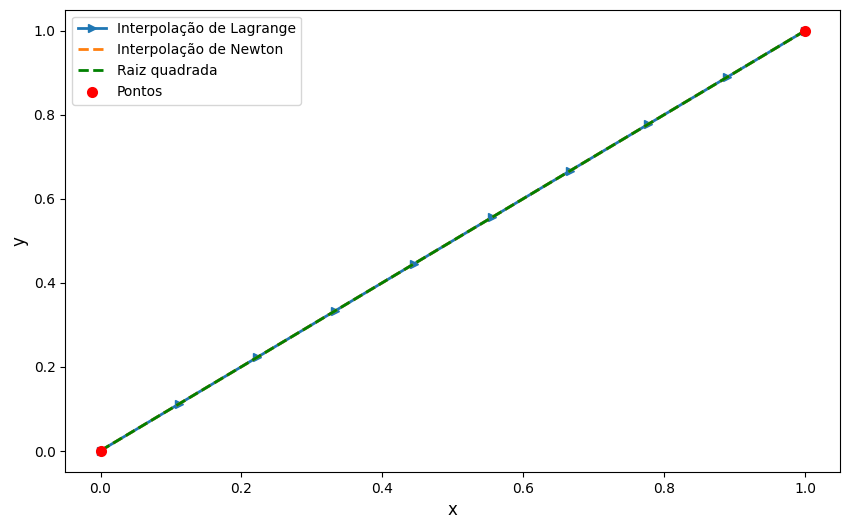

In [ ]:
xi = np.array([0.0, 1.0], dtype='double')
print(xi)
y = []
for i in xi:
  yi = m.sqrt(i)
  y.append(yi)
y = np.array(y, dtype = 'double')
print(y)
x = np.linspace(0, 1, num=10, endpoint=True)

y_lagrange = lagrange_interp(xi,y,x)
y_newton = newton_interp(xi,y,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrange,label = 'Interpolação de Lagrange',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_newton,label = 'Interpolação de Newton',linewidth = 2,linestyle='--',zorder=2)
plt.plot(xi, y,label = 'Raiz quadrada',linewidth = 2,linestyle='--',zorder=3, color = 'green')
plt.scatter(xi,y,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('')
plt.legend()
plt.show()

Os métodos de Newton e Lagrange são melhores para o intervalo [0, 1], uma vez que a spline cúbica não pode ser executada para len(xi) < n + 1